

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Wrangling">Data Wrangling</a></li>
<li><a href="#Clean">Data Cleaning</a>
<li><a href="#ex">Exploratory Data Analysis</a>
<li><a href="#highest">Questions</a></li>  
<li><a href="#conc">Conclusions</a></li>
<li><a href="#limit">Limitation</a></li>
</ul>

<a id='intro'></a>
# Introduction
Dataset Description
The Dataset which will be analysis here is "TMDb movie data" this display movies From 1960 To 2015 .. list 21 columns :(id,imdb_id,popularity budget ,revenue ,original_title, cast ,homepage, director, tagline keywords, overview, runtime, genres ,production_companies ,release_date, vote_count ,vote_average, release_year ,budget_adj ,revenue_adj)

In [244]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='Wrangling'></a>
# Data Wrangling
Here Will Load Our DataSet

General Properties
Tip: You should not perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [245]:
df = pd.read_csv('tmdb-movies2.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='Clean'></a>
# Data Cleaning




In [246]:
#Here Will Clear Our Data From Unused columns as ('id','imdb_id','popularity','cast','homepage','tagline','overview','release_date','budget_adj','revenue_adj','keywords') and to see the table with simply view with important columns .
df.drop(['id','imdb_id','popularity','cast','homepage','tagline','overview','release_date','budget_adj','revenue_adj','keywords'],axis = 1,inplace=True)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 849.0+ KB


<a id='null'></a>


In [248]:
## See If any columns has null values and remove it
df.isnull().sum()


budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [249]:
df.dropna(inplace=True)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                9807 non-null   int64  
 1   revenue               9807 non-null   int64  
 2   original_title        9807 non-null   object 
 3   director              9807 non-null   object 
 4   runtime               9807 non-null   int64  
 5   genres                9807 non-null   object 
 6   production_companies  9807 non-null   object 
 7   vote_count            9807 non-null   int64  
 8   vote_average          9807 non-null   float64
 9   release_year          9807 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 842.8+ KB


<a id='duplicate'></a>


In [251]:
### See If any columns has duplicated values
df.duplicated().sum()

1

In [252]:
#we found duplicate values ..and should remove it
df.drop_duplicates(inplace= True)

<a id='ex'></a>
# Exploratory Data Analysis

<a id='highest'></a>
#  What is The Highest Year Of Revenue & Movies Made in It ?

In [253]:
#We found Two columns (budget & revenue ) should calculate Net For revenue For each Movie
net_revenue = df.revenue - df.budget

In [254]:
df.insert(2,'net_revenue',net_revenue)

In [255]:
df.head(1)

,budget,revenue,net_revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


In [256]:
#Found Some Values is Zero So Will convert this values to null then remove it  ( this steps should made in cleaning Section )
df['net_revenue'].replace(0,np.nan)

0        1.363529e+09
1        2.284364e+08
2        1.852382e+08
3        1.868178e+09
4        1.316249e+09
             ...     
10861             NaN
10862             NaN
10863             NaN
10864             NaN
10865   -1.900000e+04
Name: net_revenue, Length: 9806, dtype: float64

In [257]:
#df['budget','net_revenue'].replace(0,np.nan,inplace=True)

In [258]:
df.dropna(inplace= True)
df.query('net_revenue  == 0')

,budget,revenue,net_revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year
74,0,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,27,5.1,2015
75,0,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,569,7.7,2015
92,0,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,11,5.4,2015
100,0,0,0,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,475,7.0,2015
101,0,0,0,High-Rise,Ben Wheatley,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,161,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...
10860,0,0,0,Carry On Screaming!,Gerald Thomas,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,13,7.0,1966
10861,0,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966
10862,0,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966
10863,0,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966


In [259]:
# Calculate the Most year has Reveneu
highest_year_revenue = df.groupby('release_year')['net_revenue'].sum()

highest_year_revenue.idxmax()

2015

In [329]:
#this function used to calculate the count of variable  
def count(a,b):
    count = df.groupby(a)[b].sum().value_counts()
    return (count)

In [330]:
#This Function is used to calculate the maimum and mininmm values for two variables
def max(x,y):
    max_value = df.groupby(x)[y].sum().idxmax()
    min_value = df.groupby(x)[y].sum().idxmin()
    return (max_value,min_value)

In [323]:
## Calculate Most Year Made Movies 
highest_year_movies = df.groupby('release_year')['original_title'].count()

highest_year_movies.idxmax()

2014

In [332]:
# Here I Use Max Function to get the  maximum and minimum  Years for net revenue
max('release_year','net_revenue')

(2015, 1966)

<a id='net_revenue'></a>
## What is the best Movie has net revenue and what's the director and its Name ?

In [263]:
df.groupby(['release_year','director','net_revenue','genres','original_title'])['net_revenue'].sum().idxmax()

(2009,
 'James Cameron',
 2544505847,
 'Action|Adventure|Fantasy|Science Fiction',
 'Avatar')

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('Realse Year For Movies',fontsize=12)
plt.ylabel('Net Revenue',fontsize=12)
plt.title('highest year revenue',fontsize=12)
plt.plot(highest_year_revenue)


###### This Plot Describe How the Progress Of The  Movies by Years Till Now

<a id='geners_increase'></a>

##  How Genres Of Movies increased by years  & Whats The Most Genres Dominate in years?


In [278]:
#The Column Of Genres Has One or more than Genres So ... I Split This Column To Show Every Genres clear and count that..and show the Genres and Release Year Only To Find Relation Between Those .
genres_release_year = pd.DataFrame(df.genres.str.split('|').tolist(),index=df.release_year).stack()
genres_release_year = genres_release_year.reset_index([0, 'release_year'])
genres_release_year.columns = ['release_year', 'genres']
genres_release_year


,release_year,genres
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,Action
...,...,...
24707,1966,Mystery
24708,1966,Comedy
24709,1966,Action
24710,1966,Comedy


In [333]:
# Here I Use count  Function to get the  Top 5 Miximum number of all Movies in each genres in all years
count('genres','original_title').head()

Annie                      2
The Thomas Crown Affair    2
Crossroads                 2
Fallen                     2
Cinderella                 2
Name: original_title, dtype: int64

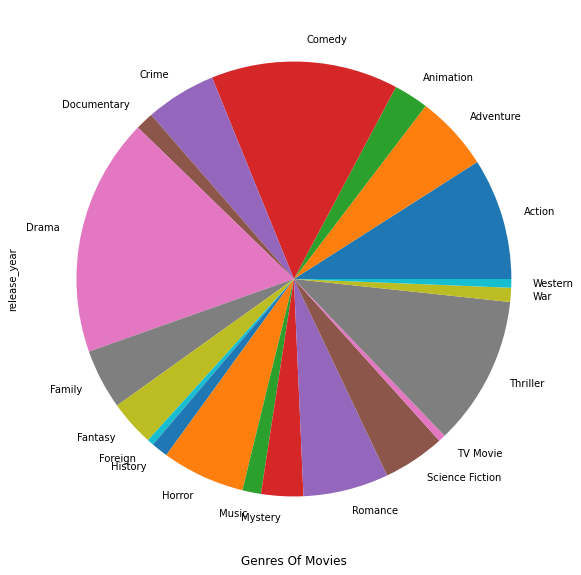

In [280]:
count_genres = genres_release_year.groupby('genres')['release_year'].sum()
count_genres.idxmax()
#count_genres=df[genres].idxmax()
plt.figure(figsize=(35,10))
plt.xlabel('Genres Of Movies',fontsize=12)
count_genres.plot.pie();


###### This Plot shows different between all genres of movies

In [276]:
#Calculate Most Genres Get Revenue by year by groupby the release year and genres counts
genres_most_year = genres_release_year.groupby('release_year')['genres'].value_counts()
genres_most_year
genres_most_year.idxmax()

(2014, 'Drama')

## This plot describe numbers of genres in last 10 years ..the most genres is thrilller in 2014

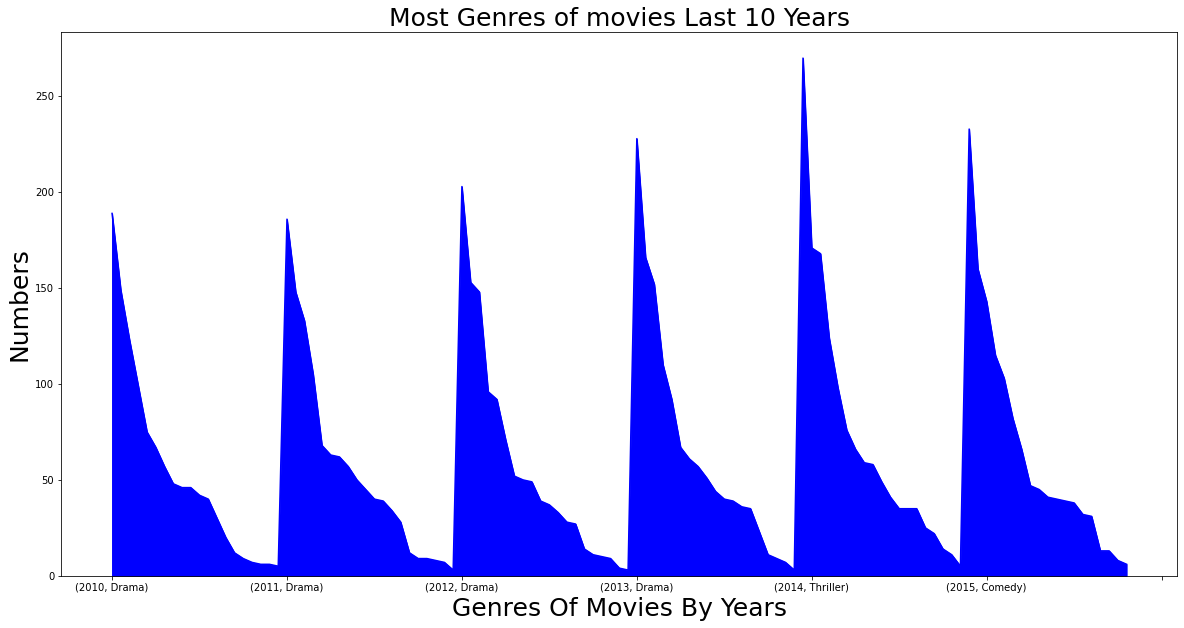

In [277]:
genres_release_year.query('release_year > 2009').groupby('release_year')['genres'].value_counts().plot(kind='area', figsize=(20,10),color='blue',alpha=1)
plt.title('Most Genres of movies Last 10 Years', fontsize = 25)
plt.xlabel('Genres Of Movies By Years',fontsize=25 )
plt.ylabel('Numbers',fontsize=25)
plt.show()

<a id='director'></a>
# What is the  Best Director By Voting & Revenue ?

In [334]:
#calculate Best Director By Voting
df.groupby('director').sum()['vote_count'].idxmax()

'Christopher Nolan'

In [335]:
# Here I Use count function to calculate the count of genres related to its directors
directors_geners = count('director','genres')
directors_geners.head()

Drama             189
Comedy            181
Documentary       130
Horror             93
Comedy|Romance     79
Name: genres, dtype: int64

In [295]:
#Calculate Best Director By Revenue with groupby  and sum of revenue then get most sum revenue for all movies of this director
df.groupby('director')['net_revenue'].sum().idxmax()

'Steven Spielberg'

In [296]:
#Calculate Most Genres By Revenue with groupby  and sum of revenue then get most sum revenue for all movies of this Revenue .
best_genres = df.groupby('genres')['net_revenue'].sum().idxmax()
best_genres

'Comedy'

<a id='conc'></a>

# Conclusions

* Highest year for revenue from 1960 till 2015 is 2015.
* Most Movies product in years  was in 2014.
* Best Movie Revenue is 'Avatar' in 2009 and director is 'James Cameron' .
* Most Genres is all Years is Drama Then action .
* Most Genres of Movies was Produced in year was Drama in 2011 .
* Best Director by Voting was 'Christopher Nolan' .
* Best Director by Net Revenue was 'Steven Spielberg'.
* Most Geners for revenue  was 'Comedy'.

<a id='limit'></a>
# Limitations

I Remove From Column 'Net_revenue' the 'zero' values after cleaning  because  its appear in the last  & i want the calculate the movies only has revenue to compare with others 